# Uitleg

* Er zijn 14 punten te verdienen. Elke deelvraag is 1 punt waard. 
* De laatste vraag is een bonus vraag, ook weer voor 1 punt.
* 1 Draai alle cellen voor je begint 
* 2 Draai alle cellen voordat je inlevert 1. Check dat er geen syntax fouten zijn.
*  Save je notebook en lever het in via Testvision examen.
    * Dit gaat goed, ook al zegt testvision dat je nog niet alle vragen gemaakt hebt.
    * Je kunt desgewenst checken of het inleveren goed gelukt is.
* De naam van je notebook moet `Deeltoets2.ipynb` zijn!

# Notebook made by  

__Name__: Ivo de Geus

__Student id__ : 1125 1190

## Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. **Assignments without the selfies will not be graded.**

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

> I will not use any material (books, internet, etc) other than this notebook while I am making this exam.

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

>(Toevoeging IK) Onderdeel van dit tentamen kan zijn dat ik mondeling mijn tentamen zal toelichten via Zoom of Skype. Dit mondeling is individueel. Ik weet dat ik dan over alle vragen en antwoorden bevraagd kan worden. De examinator bepaalt met wie en of  dit mondeling gaat plaatsvinden.

<img src="https://i.imgur.com/tzk0eXj.jpg" width="500">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uitleg" data-toc-modified-id="Uitleg-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uitleg</a></span></li><li><span><a href="#Baby-names" data-toc-modified-id="Baby-names-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Baby names</a></span><ul class="toc-item"><li><span><a href="#Jongensnamen-(4pt)" data-toc-modified-id="Jongensnamen-(4pt)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Jongensnamen (4pt)</a></span></li><li><span><a href="#Eerste-letter-(2pt)" data-toc-modified-id="Eerste-letter-(2pt)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Eerste letter (2pt)</a></span></li><li><span><a href="#Lengte-van-namen-(4pt)" data-toc-modified-id="Lengte-van-namen-(4pt)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Lengte van namen (4pt)</a></span></li><li><span><a href="#Letters-in-namen-(1pt)" data-toc-modified-id="Letters-in-namen-(1pt)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Letters in namen (1pt)</a></span></li></ul></li><li><span><a href="#Titanic-(2pt)" data-toc-modified-id="Titanic-(2pt)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Titanic (2pt)</a></span><ul class="toc-item"><li><span><a href="#Titanic-2.1-(1pt)" data-toc-modified-id="Titanic-2.1-(1pt)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Titanic 2.1 (1pt)</a></span></li></ul></li><li><span><a href="#Bonus-(1-pnt)" data-toc-modified-id="Bonus-(1-pnt)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bonus (1 pnt)</a></span></li></ul></div>

In [81]:
import os
import re

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nose.tools import assert_almost_equal, assert_equal
from pandas.testing import assert_frame_equal

%matplotlib inline


def ook_goed(var,test,dec=7):
    try: 
        A=assert_almost_equal(var,test,dec) 
    except:
        A= var.size== 1 and assert_almost_equal(var.values[0],test,dec)
    return A

# Baby names

Deze file bevat de kinderen die geboren zijn in de VS gedurende meer dan 100 jaar. Voor elke *naam* (dus niet voor elk *kind*), is er een regel met hoeveel kinderen er in een bepaald jaar met een bepaald geslacht geboren zijn met die naam. Veel namen komen per jaar twee keer voor, die zijn zowel aan jongens als aan meisjes gegeven.

We werken met een willekeurige steekproef van 10% uit de `babynames.csv` file om problemen met het geheugen te voorkomen. Die steekproef is anders op het moment dat jij de toets maakt dan op het moment van nakijken. Hardcoden van antwoorden heeft dus geen zin. **Geef dus steeds je antwoorden in termen van het dataframe `baby` of in termen van een andere Series of Dataframe gebaseerd op `baby`.**

In [122]:
%%time 

def loadfile():
    if 'babynames.csv' in os.listdir():
        return 'babynames.csv'
    elif os.path.exists('../../data/Week3/'):
        return '../../data/Week3/babynames.csv'
    elif os.path.exists('../../../data/Week3/'):
        return '../../../data/Week3/babynames.csv'


baby = pd.read_csv(loadfile()).fillna(0) # heerlijk, er zijn geen missing values!
print(baby.shape)
print(baby.head(5))

# neem de steekproef
deel=np.random.choice(baby.shape[0],int(baby.shape[0]/10),replace=False)
baby= baby.loc[deel]

# vergelijk met het origineel
print(baby.shape)
print(baby.head(5))

(1690784, 4)
        Name Sex  Count  Year
0       Mary   F   7065  1880
1       Anna   F   2604  1880
2       Emma   F   2003  1880
3  Elizabeth   F   1939  1880
4     Minnie   F   1746  1880
(169078, 4)
                Name Sex  Count  Year
363727        Hallie   M     22  1939
1065470        Teyon   M      9  1989
1342579      Maloree   F      9  2000
116279   Christopher   M    200  1914
1436460       Tiyona   F      7  2003
CPU times: user 2.34 s, sys: 326 ms, total: 2.66 s
Wall time: 1.51 s


## Jongensnamen (4pt)

1. Hoeveel jongens zitten er in het bestand `baby`? (variable `v1`)
2. Hoeveel verschillende (unieke) namen zijn er aan jongens gegeven? (variable `v2`)
3. Bereken voor elke jongensnaam het  **percentage** jongens met die naam. 
    * HINT: als je het goed hebt gedaan, tellen die percentages natuurlijk op tot 100.
    * Gebruik  die Series om de volgende twee vragen te beantwoorden.
    * Let op: deze Series wordt niet 1 van de variabelen.
4. Hoeveel namen hebben een percentage van meer dan 2% (variable `v3`)
5. Welk percentage jongens heet Donald? (variable `v4`)

 

In [123]:
# Er wordt aangenomen dat dit gaat om het aantal baby's (niet het aantal namen).
v1 = baby[baby.Sex == 'M'].Count.sum()

# Het aantal unieke namen over de jaren heen (verschillende jaren zelfde naam is niet uniek).
v2 = len(baby[baby.Sex == 'M'].Name.value_counts())

# Definieer hier je Series met percentages.
names_perc = (
    baby[baby.Sex == 'M'].groupby(by=baby.Name).Count.sum() / 
    baby[baby.Sex == 'M'].Count.sum() ) * 100

# Pak alle namen met meer dan 2 procent en pak de grootte.
v3 = names_perc[names_perc > 2.0].size

# Zoek de entry voor Donald uit de series.
v4 = names_perc['Donald']

print(v1,v2,v3,v4)

16147205 19272 5 1.1980773143091947


In [124]:
assert int(v1) 

In [125]:
assert int(v2)

In [126]:
assert int(v3)

In [127]:
assert float(v4)

## Eerste letter (2pt)

1. Hoeveel meisjes hebben een naam beginnend met een 'J'? (variable `v1`)
    * HINT: denk aan de string functie `str.get()`.
2. Hoeveel meisjes en jongens zitten er totaal in het bestand? Antwoord als een series van shape (2,) met 2 index waardes `'M'`.`'F'`. (variable `v2`)
3. Welk deel van de (bedoeld is *alle*) jongens heeft een naam beginnend met een `J`, en welk deel van de meisjes?  Antwoord als een series van shape (2,) met 2 index waardes `'M'`.`'F'`. (variable `v3`)
    * HINT: het gaat om het *deel*, dus deel dan ook 2 dataframes.
4.  Geef voor elke eerste letter van een naam, per geslacht 
 het deel van alle kinderen in de DB met een naam die met die letter begint. 
 De uitkomst is een dataframe met als index de letters waarmee namen in de DB beginnen, en 2 kolommen F en M, voor beide geslachten. (variable `v4`)
     * Een mooie test is  om de waardes in beide kolommen op te tellen. Daar moet dan in beide gevallen 1 uit komen. 
     * Bij mijn random instantie zag `v4.head()` er als volgt uit:
     
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Sex</th>
      <th>F</th>
      <th>M</th>
    </tr>
    <tr>
      <th>Name</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>A</th>
      <td>0.087824</td>
      <td>0.055055</td>
    </tr>
    <tr>
      <th>B</th>
      <td>0.048137</td>
      <td>0.049909</td>
    </tr>
    <tr>
      <th>C</th>
      <td>0.080363</td>
      <td>0.070881</td>
    </tr>
    <tr>
      <th>D</th>
      <td>0.066091</td>
      <td>0.065908</td>
    </tr>
    <tr>
      <th>E</th>
      <td>0.048550</td>
      <td>0.035633</td>
    </tr>
  </tbody>
</table>




F    0.088556
M    0.161606
dtype: float64

3997169
F    100398
M     68680
Name: Sex, dtype: int64
F    0.088556
M    0.161606
dtype: float64


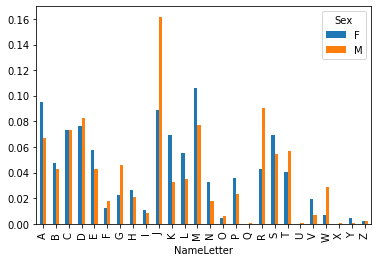

In [276]:
baby['NameLetter'] = baby.Name.str.get(0)

# Simple thing...
v1 = baby[baby.NameLetter == 'J'].Count.sum()

# Get both counts.
v2 = baby.Sex.value_counts()

# This one can be a lot better but I was in a rush...
v3 = pd.Series({
    'F': baby[(baby.NameLetter == 'J') & (baby.Sex == 'F')].Count.sum() / baby[baby.Sex == 'F'].Count.sum(),
    'M': baby[(baby.NameLetter == 'J') & (baby.Sex == 'M')].Count.sum() / baby[baby.Sex == 'M'].Count.sum()
})

# Set the name to the first letter
table = baby.pivot_table(
    columns='Sex', 
    values='Count', 
    index='NameLetter', 
    aggfunc='sum').rename({'NameLetter': 'Name'})
table.F /= table.F.sum()
table.M /= table.M.sum()
v4 = table

print(v1)
print(v2)
print(v3)

v4.plot(kind='bar');


In [277]:
assert isinstance(int(v1),int)


In [278]:
assert_equal(v2.shape,(2,))
assert_equal(set(v2.index),{'M','F'})

In [279]:
assert_equal(v3.shape,(2,))
assert_equal(set(v2.index),{'M','F'})


In [280]:
assert isinstance(v4,pd.DataFrame)
assert_equal(set(v4.columns),{'M','F'})




## Lengte van namen (4pt)

2.  Geef  een distributie en bijbehorend plot van de naamslengtes  (dus lengtes op de x-as, en hoeveel kinderen een naam van die lengte hebben  op de y-as)
     * HINT: voeg een nieuwe kolom toe aan `baby` met de lengte van de naam in aantal karakters.
     * Je gebruikt deze distributie voor de volgende vragen. Let op, hardcoden kan niet! Definieer je antwoorden dus in termen van de Series waarin je de lengtedistributie beschrijft.
     * HINT: ga voordat je verder gaat na dat je plot de waarheid kan beschrijven. Dus dat het ergens op slaat. 
     * TEST: de `sum` van de waardes in je plot moet gelijk zijn aan het totaal aantal kinderen in de `baby` file.
     * Bij mijn random instance zagen de eerste 3 regels van die Series er zo uit:
      <pre>
      2      30078
3     744895
4    4439084
Name: Count, dtype: int64
</pre>
1. Uit hoeveel letters bestaat de naam van een kind gemiddeld, gemeten over alle kinderen in `baby`? (variable `v1`)
    * HINT: denk goed na, en zorg dat je **per kind** telt. 
4. Hoeveel procent van alle kinderen heeft een naam korter of gelijk aan 5 letters?  (variable `v2`)
    * HINT: denk aan `cumsum()`.
3. Wat is de *modus* (meest voorkomende lengte) van de lengtes van namen? (variable `v3`)
    * Hint: denk aan `idxmax`.
5. En wat is de standaard afwijking van deze distributie?  (variable `v4`)
    * Hint: dit is lastig uit te rekenen met `.std()`. 
    * Hint: de formule (met $\bar{y}$ het gemiddelde) voor de standaard afwijking is $$\sqrt\frac{\Sigma_{i=1}^N(y_i-\bar{y})^2}{N}$$

6.170725937141437
42.09617678349459
6
1.4741687409280961


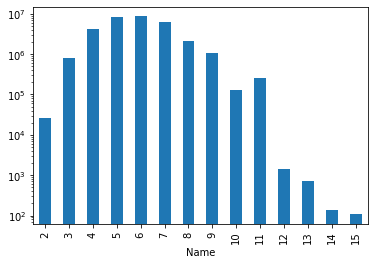

In [281]:
# Get the value count distibution for name lengths.
baby['NameLength'] = baby.Name.str.len()
distribution = baby.groupby(baby.NameLength).Count.sum()
distribution.plot(kind='bar', logy=True)

v1 = baby.NameLength.mean()
v2 = baby[baby.NameLength <= 5].Count.sum() / baby.Count.sum() * 100
v3 = distribution.idxmax()

# Deze niet zo zeker...
v4 = (((baby.NameLength - baby.NameLength.mean())**2).sum() / len(baby))**0.5


print(v1)
print(v2)
print(v3)
print(v4) 
 


In [282]:
assert isinstance(float(v1),float)


In [283]:
assert isinstance(float(v2),float)


In [284]:
assert isinstance(int(v3),int)


In [285]:
assert isinstance(float(v4),float)


## Letters in namen (1pt)

**Dit is de lastigste vraag uit het tentamen, bewaar hem dus voor het laatst.**

We willen voor elk geslacht, en voor elke letter, weten welk deel die letter uitmaakt van de namen van babies met dat geslacht. 

De uitvoer is dus een dataframe met shape `(26,2)`, met als index de 26 letters, en de twee kolommen `M` en `F`, en de cellen daarin zijn getallen tussen 0 en 1, die per kolom optellen tot 1.

Bij mij zag het plotten van dat dataframe er zo uit:

![](letters.png)

LET OP: je telt **per kind**, niet per (unieke) naam. Bedenk goed wat `(b.F * b.index.str.len()).sum(),` betekent.

HINT: gebruik de letters in `ascii_lowercase` en het dataframe `b`. 
HINT: zorg dat je lowercased. 
HINT: Je kunt gewoon pandas `str` methodes uitvoeren op `b.index`. Ik vond `.str.findall(l).str.len()` voor `l` een variabele gebonden aan een letter heel handig.
HINT: Ik gebruikte `pd.DataFrame.from_dict` en dict comprehensie om `letters` te maken.



In [286]:
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'

b= baby.groupby(['Name','Sex'])['Count'].sum().unstack()
b.head()

Sex       F     M
Name             
Aaban   NaN   5.0
Aabid   NaN   5.0
Aadam   NaN  19.0
Aadan   NaN  22.0
Aadarsh NaN  14.0

In [287]:

letters=pd.DataFrame() # vervang door jouw antwoord



letters.plot(kind='bar');
letters.sum()  # moet optellen tot 1 in beide kolommen

TypeError: no numeric data to plot

In [288]:
assert_equal(type(letters),pd.DataFrame)
assert_equal(set(letters.columns), {'F','M'})
assert_equal(letters.shape,(26,2))


AssertionError: Items in the second set but not the first:
'M'
'F'

# Titanic (2pt)

1. In de `titanic` dataset zit een boolse kolom `adult_male`. Vogel uit hoe die gedefinieerd is in termen van de **andere kolommen** in de `titanic` dataset. Jouw antwoord is een Boolse series `v1` zodat de test `(v1== titanic.adult_male).sum() == titanic.adult_male.count()` slaagt. (variable `v1`)
    * HINT: `v1` heeft dus dezelfde index als `titanic`. Je definieert `v1` dus met een boolse combinatie van tests op `titanic`.
2.  Geef het dataframe `v2` dat precies deze mooie heatmap oplevert. Dat dataframe bevat dus het deel van de mensen op de boot die het overleefd hebben    (`survived`) gegeven de 3 variabelen sex,  alone en pclass. (variable `v2`)

![](titanic2.png)

HINT: beide vragen kunnen met een oneliner beantwoord worden.

In [289]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

True


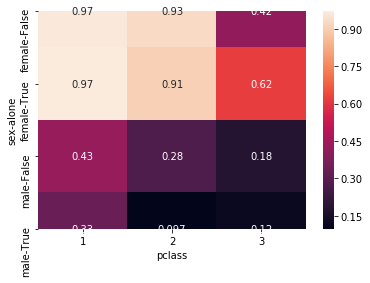

In [290]:
v1 = (titanic.sex == 'male') & ~(titanic.age < 16) 
v2 = titanic.pivot_table(values='survived', index=['sex', 'alone'], columns='pclass')

# Test voor vraag 1.
print(( v1 == titanic.adult_male).sum() == titanic.adult_male.count())

# Plot voor vraag 2.
sns.heatmap(v2, annot=True);
# Niet zo'n mooie plot, maar ik kan nu niet opzoeken hoe ik dit moet fixen.


In [291]:
assert isinstance(v1,pd.Series)
np.testing.assert_array_equal( v1.index.values, titanic.index.values)


In [292]:
assert isinstance(v2,pd.DataFrame)
assert_equal(v2.shape,(4,3)) # v2 heeft 4 rijen en 3 kolommen


## Titanic 2.1 (1pt)

De  "alive" kolom lijkt overbodig (redundant) in het   titanic dataframe.

Beargumenteer dat dit inderdaad zo is. Zowel in woorden als met code waarnaar je in je argumentatie verwijst.

Gebruik in je code `pd.testing.assert_series_equal`.

***UITLEG***
Het lijkt er op dat de kolom ```alive``` niet per sé iets zegt over of iemand op dit moment in leven is, maar exact dezelfde informatie weergeeft als ```survived```, maar dan in een string. Dit kunnen we eenvoudig testen door de string te hercoderen naar een boolean, en deze te vergelijken. Als deze overal matched, kunnen we zeggen dat de informatie redundant is.

In [293]:
# Als de waarde overal matched (som == lengte data) is de waarde overbodig.
(titanic.survived == titanic.alive.str.match('yes')).sum() == len(titanic)

True

# Bonus (1 pnt)

We gaan nog eens naar de studenten resultaten kijken.

We willen weten hoeveel studenten voor **elke assignment en deeltoets** minstens zo goed hebben gescoord als het gemiddelde voor die assignment of toets. 

**Let op, jouw functie moet ook werken op een file met andere kolomnamen, of een ander aantal kolommen.**

In [294]:
df = None

df = pd.read_csv('student_results.csv', index_col='names').fillna(1)
df.sort_index(inplace=True, ascending=False)

df.tail()


AssignmentWeek1  AssignmentWeek2  AssignmentWeek3  \
names                                                                
Albert Elliott               7.3              9.6              5.9   
Alan Davis                   9.4              5.7              7.6   
Alan Ballinger               5.4             10.0              8.2   
Adriana Mifflin              6.2             10.0              9.7   
Aaron Weekley                6.6              4.3              7.7   

                 AssignmentWeek5  AssignmentWeek6  AssignmentWeek7  \
names                                                                
Albert Elliott               7.9              7.1              2.2   
Alan Davis                   9.2              8.1              1.0   
Alan Ballinger               3.5              8.2              7.2   
Adriana Mifflin              8.2              6.2             10.0   
Aaron Weekley                3.2              8.5              6.8   

                 Deeltoets1  Deeltoets2  
names                                    
Albert Elliott          8.1         3.5  
Alan Davis              5.5         5.6  
Alan Ballinger          5.9         8.1  
Adriana Mifflin         8.4         8.5  
Aaron Weekley          10.0         7.4

In [295]:
def altijd_beter_dan_avg(data):
    """Returns the number of rows where all row values are higher than collumn averages."""
    return ((df >= df.mean()).T.sum() == df.columns.size).sum()

altijd_beter_dan_avg(df)

2

In [296]:
assert isinstance(altijd_beter_dan_avg(df),np.integer)
assert altijd_beter_dan_avg(df) <= df.shape[0]


